# Multiple Linear Regression Advertising efficiency

In [22]:
# in this nortebook we will find which adverstsing temnque is better 

In [23]:
#libraries

In [85]:
import pandas as pd

from sklearn.model_selection import train_test_split
from pycaret.regression import*
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [25]:
#load the data

In [26]:
df=pd.read_csv("advertising.csv")

In [27]:
#see first 5 cels

In [28]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
#train test split

In [30]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [31]:
#auto_model

In [32]:
#setuping

In [33]:
setup(data=train_df,target='Sales')

,Description,Value
0,Session id,2342
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(160, 4)"
4,Transformed data shape,"(160, 4)"
5,Transformed train set shape,"(112, 4)"
6,Transformed test set shape,"(48, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [34]:
#fit model

In [35]:
best_model= compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4423,0.6372,0.6136,0.9820,0.0727,0.0718,0.0550
catboost,CatBoost Regressor,0.5888,1.1539,0.8883,0.9681,0.1033,0.0980,0.3100
gbr,Gradient Boosting Regressor,0.6536,1.0191,0.8881,0.9616,0.0948,0.0892,0.0230
rf,Random Forest Regressor,0.7507,1.1821,0.9738,0.9573,0.1012,0.0985,0.0850
xgboost,Extreme Gradient Boosting,0.8138,1.3787,1.0843,0.9447,0.1065,0.1001,0.0330
ada,AdaBoost Regressor,1.0935,2.0724,1.3546,0.9189,0.1307,0.1329,0.0300
lightgbm,Light Gradient Boosting Machine,1.0695,2.4030,1.3765,0.9177,0.1402,0.1427,0.0350
dt,Decision Tree Regressor,1.0338,2.4972,1.4254,0.8763,0.1611,0.1129,0.0140
lasso,Lasso Regression,1.4043,3.7011,1.8274,0.8692,0.1720,0.1731,0.0110
llar,Lasso Least Angle Regression,1.4043,3.7011,1.8274,0.8692,0.1720,0.1731,0.0130


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [36]:
#Cros Over best model

In [37]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3918,0.2572,0.5072,0.9875,0.0404,0.0290
1,0.1993,0.0575,0.2397,0.9984,0.0175,0.0158
2,0.1909,0.0566,0.2379,0.9970,0.0132,0.0123
3,0.3327,0.1656,0.4070,0.9950,0.0232,0.0217
4,0.3895,0.2412,0.4911,0.9924,0.0372,0.0329
5,0.3710,0.2444,0.4943,0.9804,0.0431,0.0300
6,0.5290,0.5355,0.7318,0.9631,0.0633,0.0446
7,1.2940,4.3746,2.0915,0.9254,0.3928,0.4549
8,0.3725,0.1926,0.4389,0.9915,0.0340,0.0319


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
#split test data

In [39]:
#see

In [40]:
test_df.head()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7


In [41]:
#//

In [55]:
x_train_test = train_df.drop("Sales", axis=1).reset_index(drop=True)
y_train_test = train_df[["Sales"]].reset_index(drop=True)

In [56]:
#check

In [57]:
x_train_test.head()

,TV,Radio,Newspaper
0,116.0,7.7,23.1
1,177.0,9.3,6.4
2,43.1,26.7,35.1
3,62.3,12.6,18.3
4,224.0,2.4,15.6


In [58]:
#//

In [59]:
y_train_test.head()

,Sales
0,11.0
1,12.8
2,10.1
3,9.7
4,11.6


In [54]:
#fit best model

In [60]:
best_model.fit(x_train_test,y_train_test)

ExtraTreesRegressor(n_jobs=-1, random_state=2342)

In [61]:
#prepare test data

In [62]:
x_test = test_df.drop("Sales", axis=1).reset_index(drop=True)
y_test = test_df[["Sales"]].reset_index(drop=True)

In [63]:
#predictions

In [67]:
predictions=best_model.predict(x_test)

In [68]:
#model sucsescion 

In [ ]:
#R^2

In [69]:
r2_score(predictions,y_test)

0.9910452157018846

In [ ]:
#MSE

In [70]:
mean_squared_error(predictions,y_test)**.5

0.5294239086025451

In [76]:
# Access the feature importances

In [77]:
importances = best_model.feature_importances_

In [78]:
#print formula

In [79]:
print("TV: {} + Radio: {} + Newspaper: {}".format(importances[0].round(4), importances[1].round(4), importances[2].round(4)))

TV: 0.6028 + Radio: 0.3867 + Newspaper: 0.0105


we see most important advert tool is television after than radio 

In [80]:
#data virsulazation

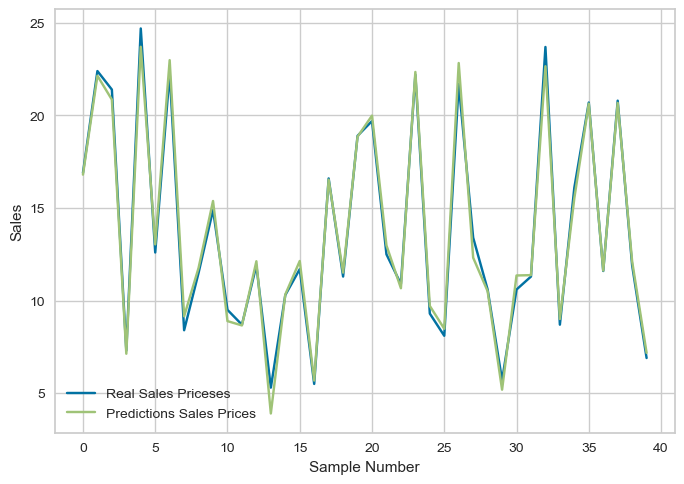

In [83]:
plt.plot(y_test, label='Real Sales Priceses')
plt.plot(predictions, label='Predictions Sales Prices')
plt.xlabel('Sample Number')
plt.ylabel('Sales')
plt.legend()
plt.show();

In [84]:
#saveing model

In [86]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [87]:
#sources

-Zafer Acar Notes
-[https://poe.com/chat/2rhcfi4djoj4u359vfr]